## GRIP task 4

In this notebook, we will be creating a decision tree classifier which should classify any new data. We will be using the iris dataset for the classifier.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Cleaning the dataset

In [4]:
df.drop('Id',axis=1,inplace=True)

In [5]:
df_split=df['Species'].str.rsplit('-',expand=True)
df.drop('Species',axis=1,inplace=True)

In [6]:
df['Species']=df_split.iloc[:,-1]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Dataset visualization

To visualize and compare the dataset, we can use the violin plot. It gives us the distribution of both sepal length and sepal width of each category in the dataset

Text(0.5, 1.0, 'Sepal Width distribution of each species')

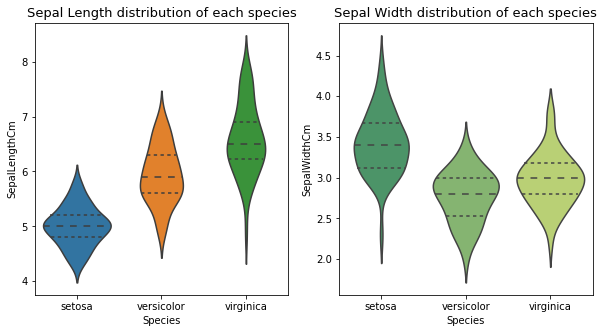

In [7]:
df_vir=df[df['Species']=='virginica']
df_set=df[df['Species']=='setosa']
df_ver=df[df['Species']=='versicolor']

fig3=plt.figure(figsize=(10,5))

ax5=fig3.add_subplot(121)

a=sns.violinplot(x='Species',y='SepalLengthCm',data=df,ax=ax5,orient='v',inner='quartile')

ax5.set_title('Sepal Length distribution of each species',size=13)

ax6=fig3.add_subplot(122)
b=sns.violinplot(x='Species',y='SepalWidthCm',data=df,ax=ax6,orient='v',inner='quartile',palette='summer')
ax6.set_title('Sepal Width distribution of each species',size=13)

### Building the model

In [8]:
df['Species']=df['Species'].replace('setosa',1)
df['Species']=df['Species'].replace('virginica',2)
df['Species']=df['Species'].replace('versicolor',3)

We do the above step in order to identify 

Setosa as 1<br>
Virginica as 2<br>
Versicolor as 3

In [9]:
target=df['Species']
df.drop('Species',axis=1,inplace=True)
X=df
y=target

### Import classifier from scikit learn

In [10]:
from sklearn.tree import DecisionTreeClassifier

### Split data into train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,shuffle=True)

In [12]:
dtc=DecisionTreeClassifier(max_depth=6)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Accuracy of the model

In [13]:
y_preds=dtc.predict(X_test)
dtc.score(X_test,y_test)

0.9736842105263158

The model has an accuracy of 97%. To check the wrongly classified instance, we create a heatmap

Text(69.0, 0.5, 'Actual')

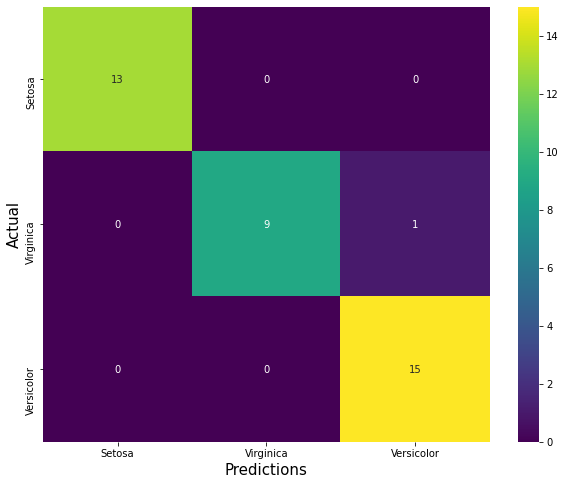

In [14]:
from sklearn.metrics import confusion_matrix
confm=confusion_matrix(y_preds,y_test)
fig6=plt.figure(figsize=(10,8))
ax9=fig6.add_subplot(111)

sns.heatmap(confm,annot=True,cmap='viridis',ax=ax9)
ax9.xaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])
ax9.yaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])
plt.xlabel('Predictions',size=15)
plt.ylabel('Actual',size=15)

Here we can see that only one instance of virginia has been wrongly classified as versicolor.

### We visualize the decision tree

[Text(372.0, 815.4, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 41, 34]\nclass = versicolor'),
 Text(279.0, 634.2, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(465.0, 634.2, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 41, 34]\nclass = versicolor'),
 Text(186.0, 453.0, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]\nclass = virginica'),
 Text(93.0, 271.80000000000007, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]\nclass = virginica'),
 Text(279.0, 271.80000000000007, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]\nclass = versicolor'),
 Text(186.0, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = versicolor'),
 Text(372.0, 90.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(744.0, 453.0, 'petal width (cm) <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]\nclass = versicolor'),
 Text(651.0, 271.80

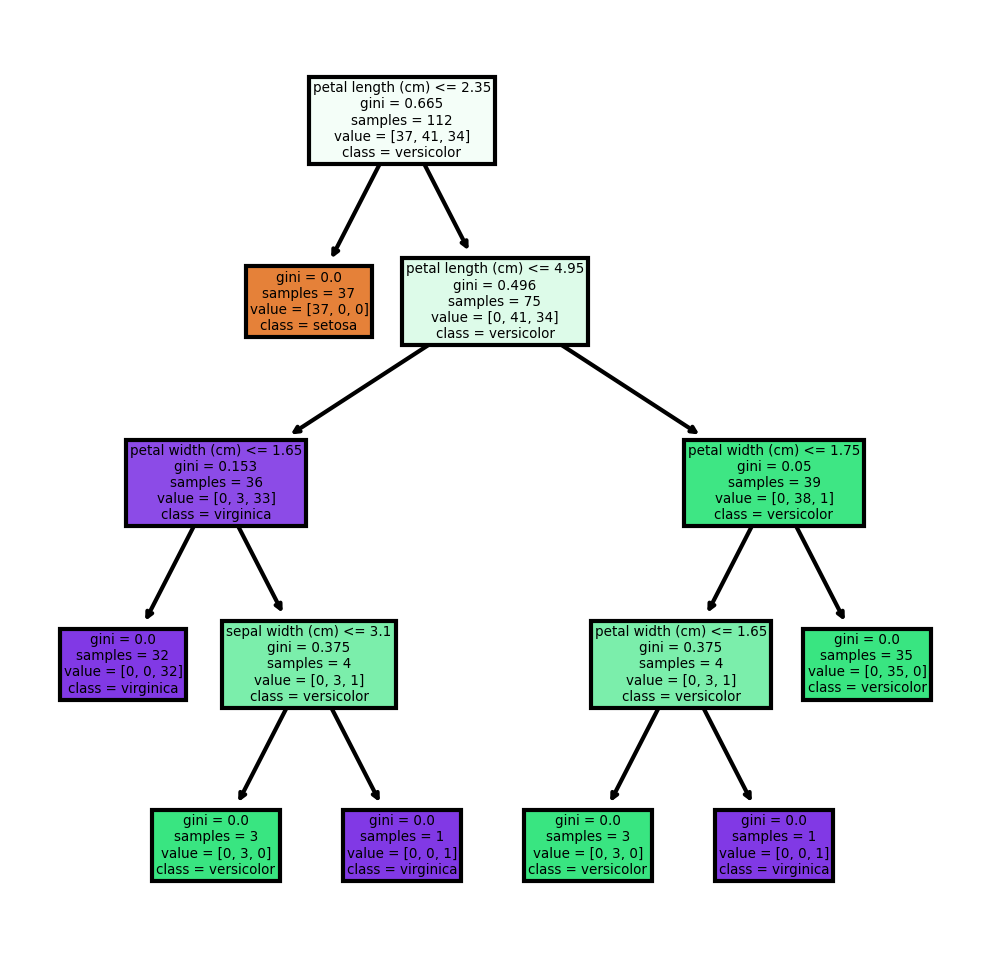

<Figure size 720x576 with 0 Axes>

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300,facecolor='w')
mpl.rcParams['text.color'] = 'black'
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(10,8))
from sklearn import tree
tree.plot_tree(dtc,feature_names = fn, class_names=cn,filled=True,ax=axes)